In [2]:
import numpy as np

import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\user\Downloads\Transactions.csv')

### Basic Data Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780000 entries, 0 to 779999
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   transaction_id         780000 non-null  object 
 1   procedure_id           780000 non-null  int64  
 2   trans_group_id         780000 non-null  int64  
 3   trans_group            780000 non-null  object 
 4   procedure_name         780000 non-null  object 
 5   instance_date          779998 non-null  object 
 6   property_type_id       780000 non-null  int64  
 7   property_type          780000 non-null  object 
 8   property_sub_type_id   613342 non-null  float64
 9   property_sub_type      613342 non-null  object 
 10  property_usage         780000 non-null  object 
 11  reg_type_id            780000 non-null  int64  
 12  reg_type               780000 non-null  object 
 13  area_id                780000 non-null  int64  
 14  area_name              780000 non-nu

In [ ]:
df[['actual_worth_millions']].describe(include='all')

,actual_worth_millions
count,780000.000000
mean,3.951110
std,68.204193
min,0.000001
25%,0.727668
50%,1.322888
75%,2.451000
max,13786.936424


In [52]:
df['actual_worth_millions'].quantile([0.9, 0.95, 0.99, 0.999])

0.900      4.5000
0.950      8.0500
0.990     38.0000
0.999    253.8012
Name: actual_worth_millions, dtype: float64

In [53]:
df = df[df['actual_worth_millions'] <=38]

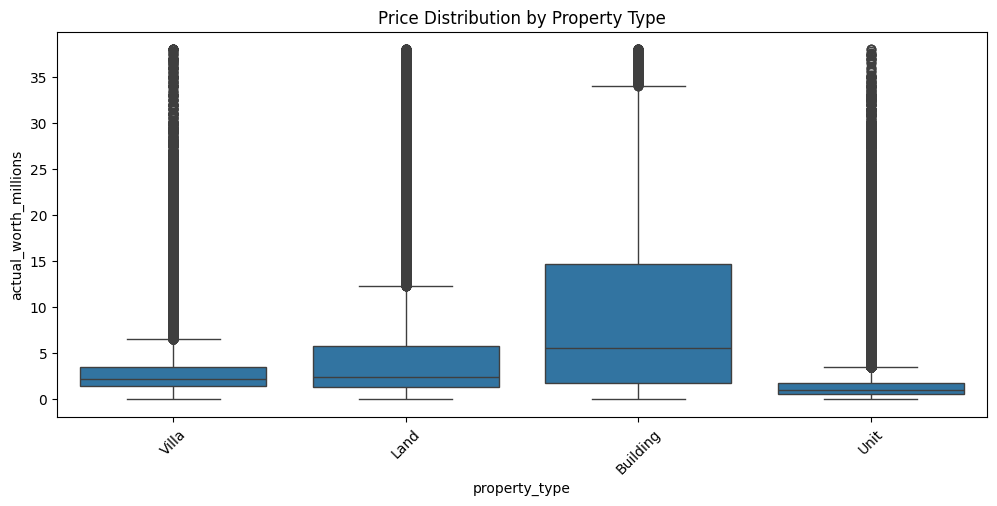

In [54]:
# Property Type Insights
plt.figure(figsize=(12, 5))

sns.boxplot(data=df, x='property_type', y='actual_worth_millions')

plt.xticks(rotation=45)
plt.title('Price Distribution by Property Type')

plt.show()

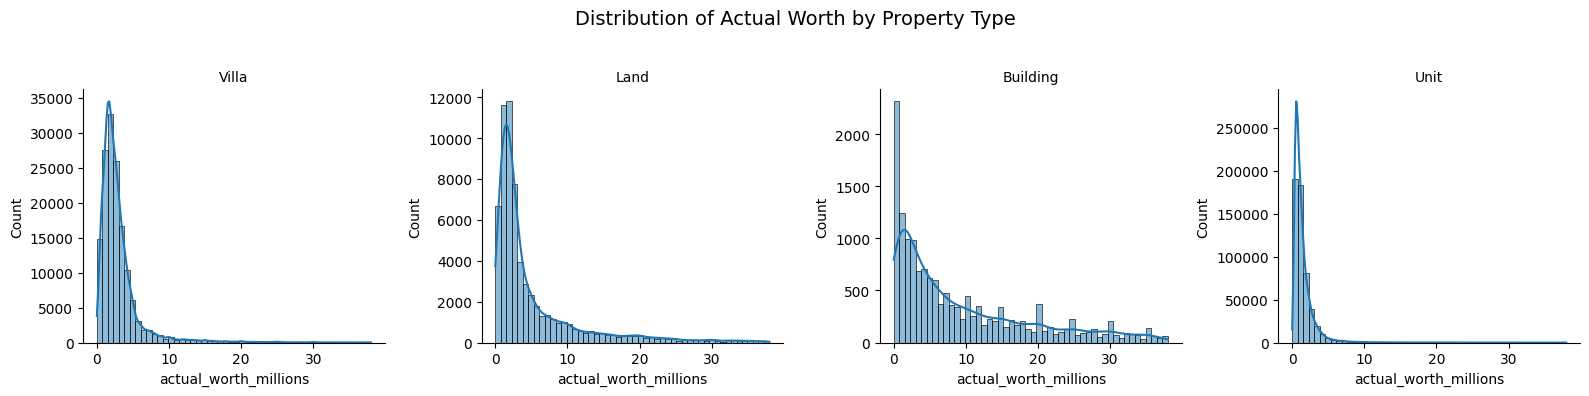

In [60]:
# Create histograms for each property type
g = sns.FacetGrid(df, col="property_type", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "actual_worth_millions", bins=50, kde=True)

# Set titles
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Distribution of Actual Worth by Property Type", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

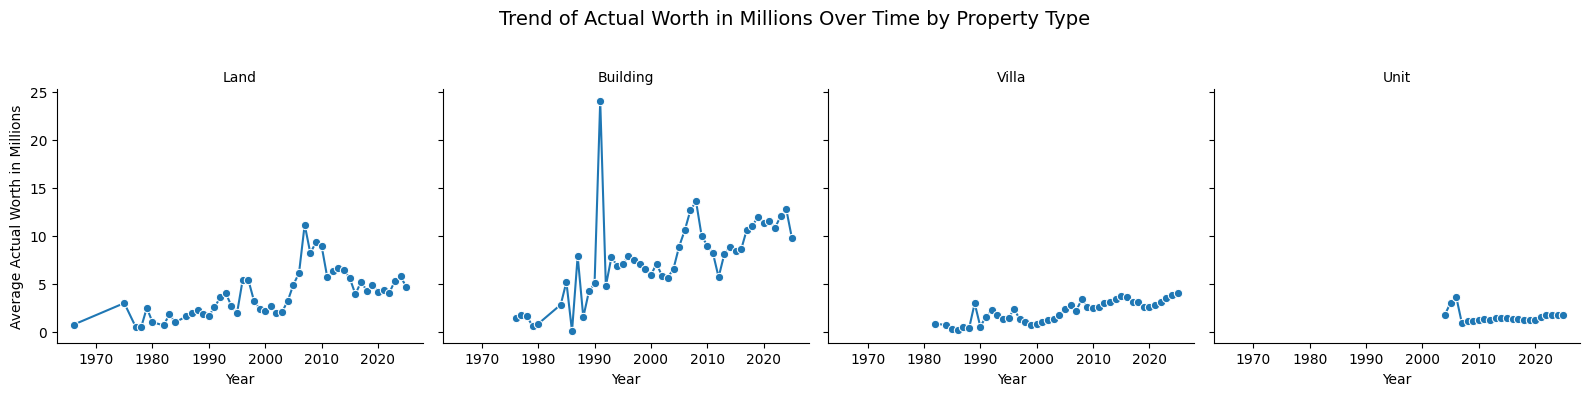

In [64]:
# Ensure datetime format
df['instance_date'] = pd.to_datetime(df['instance_date'])
df['year'] = df['instance_date'].dt.year
df['month'] = df['instance_date'].dt.month

# Group by year and property type, then compute the mean actual worth
trend_data = df.groupby(['year', 'property_type'])['actual_worth_millions'].mean().reset_index()

# Set up FacetGrid for separate line plots by property type
g = sns.FacetGrid(trend_data, col="property_type", col_wrap=4, height=4, sharex=True, sharey=True)

# Map the lineplot function
g.map_dataframe(sns.lineplot, x="year", y="actual_worth_millions", marker="o")

# Titles and layout adjustments
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Trend of Actual Worth in Millions Over Time by Property Type", fontsize=14)
g.set_axis_labels("Year", "Average Actual Worth in Millions")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [68]:
df.columns

Index(['transaction_id', 'procedure_id', 'trans_group_id', 'trans_group',
       'procedure_name', 'instance_date', 'property_type_id', 'property_type',
       'property_sub_type_id', 'property_sub_type', 'property_usage',
       'reg_type_id', 'reg_type', 'area_id', 'area_name', 'building_name',
       'project_number', 'project_name', 'master_project', 'nearest_landmark',
       'nearest_metro', 'nearest_mall', 'rooms', 'has_parking',
       'procedure_area', 'actual_worth_millions', 'meter_sale_price',
       'geometry', 'year', 'month'],
      dtype='object')

In [4]:
# Convert categorical variables to numeric
df_encoded = pd.get_dummies(df[['actual_worth_millions', 'propety_type']], columns=['property_type'], drop_first=True)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


KeyError: "['propety_type'] not in index"